### Simulating an outbreak on the Watermelon Meow Meow Network. 

To simulate an outbreak on a network we will need to append disease states (susceptible, infected, removed) to each individual (node) in the network and build a suite of functions that model how the disease states of nodes change when they interact with one another.

**Disease states under consideration**

We will assume that every node is in one of three disease states: susceptible, infected, removed. 

**How infections propogate**

We will aslso assume that at every time step a susceptible node becomes infected with probability 
$$
\begin{align}
    P(\textrm{Infection}) = 1 - (1-p)^{ I }
\end{align}
$$
where $I$ is equal to the number of neighbors that are infected and $p$ is a parameter that defines the probability of transmission of the Watermelon Meow Meow disease.
As we discussed in class, if the probability of transmission is equal to $p$ then the probability that a susceptible individual is **not** infected by $I$ individuals is equal to 
$$
\begin{align}
    P(\textrm{Escape infection}) &= (1-p) \cdot (1-p) \cdot (1-p) \cdots (1-p) \\ 
    &= (1-p)^{I}
\end{align}
$$
Then, the probability that a susceptible individual does not escape infection equals $1 - P(\textrm{Escape infection})$ or $1 - (1-p)^{I}$. 

**The length of infectious period**

For this model we can assume that the infectious period of individuals in the system follows a Gamma density with parameters (5,1). That is, if we represent the infectious period of an individual with the random variable $X$ then the infectious period follows
$$
\begin{align}
    X \sim \textrm{Gamma}(5,1)
\end{align}
$$
**Adding disease states to every node**

The disease states S,I,R can be added to each node as follows:

In [2]:
import pandas as pd 
WMMM = pd.read_csv("../wmm_networks/mcandrew_watermelon_meow_meow__2023S__DEIDENTIFIED.csv")
WMMM

#--import networkx
import networkx as nx 

#--create an empty graph
g = nx.Graph()

#--loops through every edge in the WMM dataframe
#--add an edge for every (infector, infected) pair. 
for index,row in WMMM.iterrows():
    g.add_edge( row.infector, row.infected )

In [3]:
#--assign s,i,r states to every node
#--make sure everyone is susceptible
for node in g.nodes():
    g.nodes[node]["s"] = 1
    g.nodes[node]["i"] = 0
    g.nodes[node]["r"] = 0

where we assume that an individual can be in only one disease state at a time. 
That is, it is not possible that an individual is both suscpetible and removed. 
We assigned to each node the variables s, i, r and assigned these variables the values 1,0,0. 
That is, we consider everyone susceptible. 

We will also need to assign to every person a random number that follows a $\textrm{Gamma}(5,1)$ density representing, if they were to become infected, the number of time steps that they would remain in the infectious period. 

Below is a histogram of the $\textrm{Gamma}(5,1)$ density.
We see that many indiviudals wll have a typical infectious period of between 4 and 6 time steps while some individuals will have a short infectious period of 1 day and others a long infectious period of more than 10 days. 

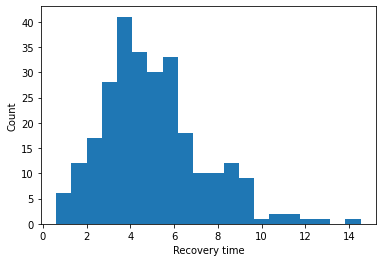

In [4]:
import numpy as np 

#--numnber of nodes in network
N = len(g)
recovery_times = np.random.gamma(5,1,size=N)

fig,ax = plt.subplots()
ax.hist(recovery_times,20)
ax.set_xlabel("Recovery time")
ax.set_ylabel("Count")
plt.show()

Lets assign these infectious period (or recovery) times to each node in an attribute called "t" (for time to recovery). 
When a node is infected this attribute "t" will be decreased by one at every time step.

We can produce the list of all nodes with the ``nodes`` method in ``networkx``.
We then have a list of $N$ recovery times and a list of the $N$ nodes. 
We want to assign the first recovery time to the first node in the list, the second recovery time to the second node in the list and so on. 

To glue together two (or more) lists use the ``zip`` command.
Here is a small example of how the zip command works 

In [5]:
Xs = ['1','2','3']
Ys = ['4','5','6']

for x,y in zip(Xs,Ys):
    print(x + "-" + y)

1-4
2-5
3-6


The list `Xs` is aligned with the list `Ys`. 
At the **ith** iteration of the loop the item `Xs[i]` is stored in `x` and the item `Ys[i]` is stored in `y`.


We can zip together our recovery times and the nodes in our network. 
At each iteration we will assign a recovery time to a node. 

In [6]:
##--assigning infectious periods to everyone from the list recovery_times
for r,node in zip(recovery_times, g.nodes()):
    g.nodes[node]["t"] = r

### One infection 

Before you are asked as homework to build a suite of functions to simualte an outbreak, i will introduce a function to select a single node at random and infect that node. 
The states of that node will change from (S=1, I=0, R=0) to (S=0, I=1, R=0). 

In [7]:
#--add an infection 
def infect_random_node(g):
    nodes = list(g.nodes())            #--a list of all the nodes in the network
    patient0 = np.random.choice(nodes) #--choose a node at random
        
    #--change that node's disease state from susceptible to infected. 
    g.nodes[patient0]["s"]=0
    g.nodes[patient0]["i"]=1
    g.nodes[patient0]["r"]=0

### Homework

We need **nine** functions to help us simulate an outbreak.
Each function is described in words below and you are asked to fill in the code to produce a desired output. 
With each function i have test code so that you can check if you are performing each function correctly. 

### Function one: From Suscpeible to infected
We need a function titled `from_s_to_i` that takes as input a `node` and a `network` and updates this node with the disease state infected. 
This means that we change the state S to 0, the state I to 1, and the state R to 0. 
Your function will need to select a node `n` from a graph `g`, using the `g.nodes` method and modify the "s", "i", and the "r" attributes. 
*Hint*: Take a look at the code above where i assigned all the nodes to the susceptible state. 

In [8]:
#--this is the answer
def from_s_to_i(n,g):
    pass

#--this is for students
def test_function_one( fun ):
    import networkx as nx
    g = nx.gnm_random_graph(10, 5)
    
    for node in g.nodes():
        g.nodes[node]["s"] = 1
        g.nodes[node]["i"] = 0
        g.nodes[node]["r"] = 0

    #--change state 
    fun(1,g)
    
    node = g.nodes[1]
    if node["s"] == 0 and node["i"] == 1 and node["r"] == 0:
        print("Pass")
    else:
        print("Did not pass, keep trying!")
        
#--example test
test_function_one( from_s_to_i )

Did not pass, keep trying!


### Function two: From Infected to Removed
We need a function titled `from_i_to_r` that takes as input a `node` and a `network` and updates this node with the disease state removed. This means that we change the state S to 0, the state I to 0, and the state R to 1.
This code should look extremely similar to the code you used to prouce `from_s_to_i` except that we are changing the disease state of a node to removed. *Hint* Start by copy and pasting your `from_s_to_i` code. 

In [9]:
#--this is the answer
def from_i_to_r(n,g):
    pass

#--this is for students
def test_function_two( fun ):
    import networkx as nx
    g = nx.gnm_random_graph(10, 5)
    
    for node in g.nodes():
        g.nodes[node]["s"] = 1
        g.nodes[node]["i"] = 0
        g.nodes[node]["r"] = 0

    #--change state 
    fun(5,g)
    
    node = g.nodes[5]
    if node["s"] == 0 and node["i"] == 0 and node["r"] == 1:
        print("Pass")
    else:
        print("Did not pass, keep trying!")
        
test_function_two( from_i_to_r)

Did not pass, keep trying!


### Function three: Check if a node is in the infected state
We need a function titled `is_infected` that takes as input a `node` and a `network` and returns the value one if the node is in the infected state and the value zero otherwise. 
Remeber that you can access a dictionary of the attributes of a node using the `g.nodes` method. 

For example, if i access the node titled "profm" then a dictionary of attributes will be returned.

In [10]:
#--accessing a dictionary of attirbutes that are attached to the node "thm220"
g.nodes[942]

{'s': 1, 'i': 0, 'r': 0, 't': 2.050093353983112}

In [11]:
#--this is the correct answer
def is_infected(n,g):
    pass

#--this is for students
def test_function_three( fun ):
    import networkx as nx
    g = nx.gnm_random_graph(10, 5)
    
    for node in g.nodes():
        g.nodes[node]["s"] = 1
        g.nodes[node]["i"] = 0
        g.nodes[node]["r"] = 0

    #--change state 
    from_s_to_i(5,g)
    
    if is_infected(5,g)==1 and is_infected(2,g)==0:
        print("Pass")
    else:
        print("Did not pass, keep trying!")

test_function_three( is_infected )

Did not pass, keep trying!


### Function four: Check if a node is in the removed state
We need a function titled `is_removed` that takes as input a `node` and a `network` and returns the value one if the node is in the removed state and the value zero otherwise.
This will look very close to the function above `is_infected`. *Hint* Start by copy and pasting your code above for `is_infected`. 

In [12]:
#--this is the correct answer
def is_removed(n,g):
    pass

#--this is for students
def test_function_four( fun ):
    import networkx as nx
    g = nx.gnm_random_graph(10, 5)
    
    for node in g.nodes():
        g.nodes[node]["s"] = 1
        g.nodes[node]["i"] = 0
        g.nodes[node]["r"] = 0

    #--change state 
    from_s_to_i(5,g)
    from_i_to_r(3,g)
    
    if is_removed(3,g)==1 and is_removed(5,g)==0:
        print("Pass")
    else:
        print("Did not pass, keep trying!")

test_function_four( is_removed )

Did not pass, keep trying!


### Function five: Count the number of infected nodes
We need a function titled `ninfected` that takes as input a `node` and a `network` and returns the number of neighbors of `node` that are in the infected state. You will need the networkx method `neighbors` [https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html) and you should use the function you wrote above called `is_infected` to count all the nodes that are infected. 

The `neigbors` method takes as input a node and returns an iterator of all the neighbors of that node.
Iterators can be a bit tricky to work with and so we can change change an interator to a list with the `list` function. 
For example, suppose i wish to return the list of all nodes that are neighbors of the node "profm". 
Then i can write 

In [13]:
list(g.neighbors(942))

[607,
 294,
 282,
 597,
 843,
 450,
 233,
 443,
 935,
 460,
 831,
 93,
 707,
 654,
 915,
 647,
 144,
 667,
 4,
 279,
 103,
 212,
 870,
 853,
 805,
 68,
 976,
 153,
 376,
 867]

In [14]:
#--this is the correct answer
def ninfected(n,g):
    pass


#--this is for students to test
def test_function_five( fun ):
    import networkx as nx
    g = nx.gnm_random_graph(10, 5)
    
    for node in g.nodes():
        g.nodes[node]["s"] = 1
        g.nodes[node]["i"] = 0
        g.nodes[node]["r"] = 0

    #--choose node 5 and add neighbors until three
    num_neighbors = len(list(g.neighbors(5)))
    while num_neighbors <= 3:
            non_neighbors = set(np.arange(10)) - set(list(g.neighbors(5)))
            node_to_add = np.random.choice(list(non_neighbors))
            g.add_edge(5,node_to_add)
            
            num_neighbors = len(list(g.neighbors(5)))
    
    #--change state 
    random_neighbors = np.random.choice(list(g.neighbors(5)), 3, replace=False) 
    for node in random_neighbors:
        from_s_to_i(node,g)
    
    result = ninfected(5,g)
    
    if not isinstance(result, int):
        print("Make sure to return an integer")
    else:
        if ninfected(5,g)==3:
            print("Pass")
        else:
            print("Did not pass, keep trying!")
test_function_five(ninfected)

Make sure to return an integer


### Function six: Probability of infection
We need a function titled `prob_of_infection` that takes as input a `node`, `network`, and a probability of transmission `p` and returns the probability that at least one infected neighbor will infect `node`. 
You should use the function `ninfected` to compute the number of infected neighbors of `node`.

In [15]:
#--this is the correct answer
def prob_of_infection(n,g,p):
    pass


#--this is for students to test
def test_function_six( fun ):
    import networkx as nx
    g = nx.gnm_random_graph(10, 5)
    
    for node in g.nodes():
        g.nodes[node]["s"] = 1
        g.nodes[node]["i"] = 0
        g.nodes[node]["r"] = 0

    #--add some certain edges
    g.add_edge(1,5)
    g.add_edge(2,5)
    g.add_edge(9,5)
    
    #--infect
    from_s_to_i(1,g)
    from_s_to_i(9,g)
    
    #--test
    p=0.3
    
    correct_ans = 1 - (1-p)**2
    proposed_ans = prob_of_infection(5,g,p)
    
    if correct_ans == proposed_ans:
        print("Pass")
    else:
        print("Did not pass, keep trying!")
test_function_six(prob_of_infection)

Did not pass, keep trying!


### Function seven: List all the infected nodes
We will need a function titled `infected_nodes` that takes as input a network and returns a list of all the nodes that are in the infected state. You can create an empty list titled `infected_nodes`, loop through all nodes $(n)$ in a network `g` using the `nodes()` method, determine if the node $n$ is infected and append it to the list `infected_nodes`. If a node is not infected than we skip that node and move to the next node in the loop.

```
for node in g.nodes():
    <Code to determine if a node is infected and add to a list titled infected_nodes>
```

In [16]:
#--this is the correct answer
def infected_nodes(g):
    pass


#--this is for students to test
def test_function_seven( fun ):
    import networkx as nx
    g = nx.gnm_random_graph(10, 5)
    
    for node in g.nodes():
        g.nodes[node]["s"] = 1
        g.nodes[node]["i"] = 0
        g.nodes[node]["r"] = 0
    
    #--infect
    from_s_to_i(1,g)
    from_s_to_i(9,g)
    from_s_to_i(3,g)
    from_s_to_i(2,g)

    ans = fun(g)
    
    if not isinstance(ans, list):
        print("Must be a list")
    else:
        if set(ans) == set([1,9,3,2]):
            print("Pass")
        else:
            print("Did not pass, keep trying!")
test_function_seven(infected_nodes)

Must be a list


### Function eight: Decrement recovery time
We will need a function titled `decrement_time` that takes as input a `node` and a `network` and decreases the `t` attribute that is attached to `node` by one. 
This function does not need to return anything, it needs to decrement an attribute of our network. 

In [17]:
#--this is the correct answer
def decrement_time(n,g):
    pass

#--this is for students to test
def test_function_eight( fun ):
    import networkx as nx
    g = nx.gnm_random_graph(10, 5)
    
    for node in g.nodes():
        g.nodes[node]["s"] = 1
        g.nodes[node]["i"] = 0
        g.nodes[node]["r"] = 0
        g.nodes[node]["t"] = 0
    
    g.nodes[5]["t"] = 1
        
    #--run function
    decrement_time(5,g)
    
    ans = g.nodes[5]["t"]
    correct_ans = 0
       
    if ans == correct_ans:
         print("Pass")
    else:
         print("Did not pass, keep trying!")
            
test_function_eight( decrement_time )

Did not pass, keep trying!


### Function nine: Is time up
We will need a function titled `is_time_up` that takes as input a `node` and a `network` and returns the value one if the `t` attribute is less than or equal to zero and returns the value zero otherwise.
This function will determine if the infectious period for a node is over. 

In [18]:
#--this is the correct answer
def is_time_up(n,g):
    pass


#--this is for students to test
def test_function_nine( fun ):
    import networkx as nx
    g = nx.gnm_random_graph(10, 5)
    
    for node in g.nodes():
        g.nodes[node]["s"] = 1
        g.nodes[node]["i"] = 0
        g.nodes[node]["r"] = 0
        g.nodes[node]["t"] = 0
    
    g.nodes[5]["t"] = 1
        
    #--run function
    decrement_time(5,g)
    
    ans = is_time_up(5,g)
    correct_ans = 1
       
    if ans == correct_ans:
         print("Pass")
    else:
         print("Did not pass, keep trying!")
            
test_function_nine( is_time_up )

Did not pass, keep trying!


### Putting all of these functions to use to simulate an outbreak. 

Given a parameter `p` that describes the probability of an effective contact, we will simulate an outbreak on a network over `T` time steps. 
Here are all the steps that use your nine function to generate an outbreak.

In [19]:
#--set our parameters
T = 20
p = 0.90

#--infect one node at random. 
infect_random_node(g)

#--create an empty list that will store the number of prevalent infections over time 
infections_over_time = []

for time in range(T):
    break #--<<remove this when you start coding

    #--Create a var called previous_infections that is a list of all infected nodes
    previous_infections     = infected_nodes(g)
    
    #--Create a var called num_previous_infections that counts the number of infected nodes
    num_previous_infections = len(previous_infections)

    #--Append num_previous_infections to the list infections_over_time
    infections_over_time.append(num_previous_infections)

    #--Section: propogate infections
    for node in g.nodes():
        #--Compute the probability that node is infected (use your prob_of_infection function)
        #--MAKE SURE TO CALL THIS PROBABILITY "prob"
        prob = prob_of_infection(node,g,p)

        #--If the node is in the removed state, skip this node by using the "continue" comand
        #--Note: you will want to use your is_removed function. 
        if is_removed(node,g):
            continue
        
        #--This piece of code infects a node with probability prob
        if np.random.random() < prob:
            from_s_to_i(node,g)
            
    #--Section: Recovery
    #--Loop through all infected individuals 
    for infected in previous_infections:
        #--include code that changes the disease state of the node infected to the recovered state
        #--you will need your function titled from_i_to_r
        from_i_to_r(infected,g)

Please plot the list `infections_over_time`.
Add an xlabel using either `plt.xlabel` or `ax.set_xlabel` with the text "Time" and a ylabel with the text "Number of infections". 

In [20]:
#--student will complete this plot 

### FINAL  STEP

Please wrap all of the code above into a function titled `simulate_outbreak`.
This function will take two arguments: `T` and `p` and returns `infections_over_time`.

In [21]:
def simulate_outbreak(T,p=0.1):
    #--make sure everyone is susceptible
    for node in g.nodes():
        g.nodes[node]["s"] = 1
        g.nodes[node]["i"] = 0
        g.nodes[node]["r"] = 0

    ##--assigning infectious periods to everyone if they get infected
    recovery_times = np.random.gamma(5,1, size=len(g))

    for r,node in zip(recovery_times, g.nodes()):
        g.nodes[node]["t"] = r

    #--add an infection 
    patient0 = np.random.choice(list(g.nodes()))

    g.nodes[patient0]["s"]=0
    g.nodes[patient0]["i"]=1
    g.nodes[patient0]["r"]=0

    infections_over_time = []

    for time in range(T):
        previous_infections     = infected_nodes(g)
        
        num_previous_infections = len(previous_infections)

        infections_over_time.append(num_previous_infections)

        #--propogate infections
        for node in g.nodes():
            prob = prob_of_infection(node,g,p)

            #--skip this node if it is removed
            if is_removed(node,g):
                continue
            
            #--infection!
            if np.random.random() < prob:
                from_s_to_i(node,g)

        #--remove all previous infections 
        for infected in previous_infections:
            decrement_time(infected,g)

            if is_time_up(infected,g):
                from_i_to_r(infected,g)
    return infections_over_time

The codebelow takes your `simulate outbreak` function, runs this 1000 times, and plots the number of prevalent cases for each iteration. 

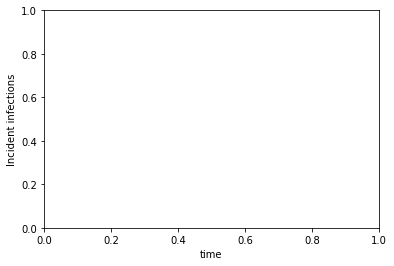

In [22]:
import sys
infections = []
for i in range(1000):
    break #<--remove this when you are ready
    
    sys.stdout.write("\r Simulating {:03d}".format(i))
    infections_over_time = simulate_outbreak(T=50,p=0.1)
    plt.plot(infections_over_time, color= "blue", alpha=0.1)

plt.ylabel("Incident infections")
plt.xlabel("time")
plt.show()

What factors are responsible for the collections of different trajectories of the number of infections over time? 
In what ways does a model like this relate to a system of differential equations (like the SIR) and in what ways does this model differ from an SIR-like model? 
